In [1]:
# all necessary imports
import matplotlib.pyplot as plt
import numpy as np
import random
from queue import Queue

### In this file are two versions of maze . Class realization and by functions.

### Class realization

In [102]:
class Maze:
    
    def generate_maze(self, size):
        """
        Generate a maze using depth-first search algorithm.

        Args:
            size (int): The size of the maze grid (excluding walls).

        Returns:
            numpy.ndarray: The generated maze represented as a numpy array,
                           where 0s represent open paths and 1s represent walls.

        Notes:
            This method creates a maze using depth-first search algorithm by starting at a random point,
            then moving in random directions while carving a path through the maze.

        """

        maze = np.ones((size*2+1, size*2+1))
        x, y = (0, 0)
        maze[2*x+1, 2*y+1] = 0

        stack = [(x, y)]
        while len(stack) > 0:
            x, y = stack[-1]
            directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
            random.shuffle(directions)

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if nx >= 0 and ny >= 0 and nx < size and ny < size and maze[2*nx+1, 2*ny+1] == 1:
                    maze[2*nx+1, 2*ny+1] = 0
                    maze[2*x+1+dx, 2*y+1+dy] = 0
                    stack.append((nx, ny))
                    break
            else:
                stack.pop()

        maze[1, 0] = 0
        maze[-2, -1] = 0
        return maze

    
    def find_path(self, maze):
        """
        Find the shortest path in the maze using Breadth-First Search (BFS) algorithm.

        Args:
            maze (numpy.ndarray): The maze represented as a numpy array.

        Returns:
            list or None: The shortest path from the starting point to the ending point,
                          represented as a list of coordinates (x, y). Returns None if no path is found.

        Notes:
            This method assumes that the maze is represented as a numpy array with zeros indicating open paths
            and ones indicating walls.

        """
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        start = (1, 1)
        end = (maze.shape[0]-2, maze.shape[1]-2)
        visited = np.zeros_like(maze, dtype=bool)
        visited[start] = True
        queue = Queue()
        queue.put((start, []))
        while not queue.empty():
            (node, path) = queue.get()
            for dx, dy in directions:
                next_node = (node[0]+dx, node[1]+dy)
                if (next_node == end):
                    return path + [next_node]
                if (next_node[0] >= 0 and next_node[1] >= 0 and 
                    next_node[0] < maze.shape[0] and next_node[1] < maze.shape[1] and 
                    maze[next_node] == 0 and not visited[next_node]):
                    visited[next_node] = True
                    queue.put((next_node, path + [next_node]))
                    
    def draw_maze(self, maze, path=None):
        """
        Display the maze with optional solution path.

        Args:
            maze (numpy.ndarray): The maze grid represented as a numpy array.
            path (list, optional): The solution path through the maze. Defaults to None.

        Returns:
            None

        Notes:
            This method visualizes the maze grid along with an optional solution path.
            It also draws entry and exit arrows indicating the start and end points of the maze.

        """
        fig, ax = plt.subplots(figsize=(9,9))
        fig.patch.set_edgecolor('white')
        fig.patch.set_linewidth(0)

        ax.imshow(maze, cmap=plt.cm.binary, interpolation='nearest')
        if path is not None:
            x_coords = [x[1] for x in path]
            y_coords = [y[0] for y in path]
            ax.plot(x_coords, y_coords, color='red', linewidth=2)

        ax.set_xticks([])
        ax.set_yticks([])

        ax.arrow(0, 1, .4, 0, fc='#FF5733', ec='#FF5733', head_width=0.3, head_length=0.3)
        ax.arrow(maze.shape[1] - 1, maze.shape[0]  - 2, 0.4, 0, fc='Cyan', ec='Cyan', head_width=0.3, head_length=0.3)

        plt.show()
        

In [103]:
m = Maze()
dim = int(input("Enter the size of the maze: "))

Enter the size of the maze: 5


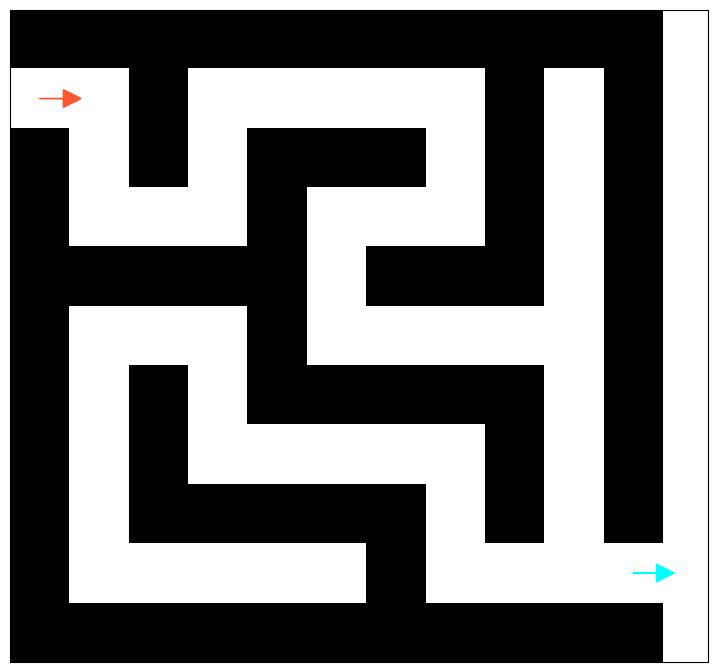

In [104]:
# maze
maze = m.generate_maze(dim)
m.draw_maze(maze)

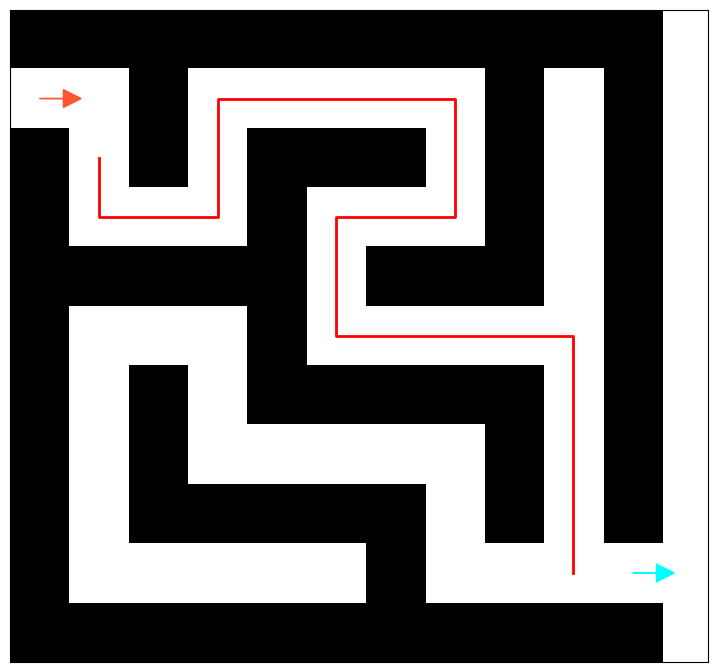

In [105]:
# maze solution
path = m.find_path(maze)
m.draw_maze(maze, path)

### Realization by functions

In [107]:
def generate_maze(size):
    maze = np.ones((size*2+1, size*2+1))
    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0
    stack = [(x, y)]
    while len(stack) > 0:
        x, y = stack[-1]

        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx >= 0 and ny >= 0 and nx < size and ny < size and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.append((nx, ny))
                break
        else:
            stack.pop()
            
    maze[1, 0] = 0
    maze[-2, -1] = 0

    return maze

In [3]:
# implement BFS algorithm 
def find_path(maze):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    start = (1, 1)
    end = (maze.shape[0]-2, maze.shape[1]-2)
    visited = np.zeros_like(maze, dtype=bool)
    visited[start] = True
    queue = Queue()
    queue.put((start, []))
    while not queue.empty():
        (node, path) = queue.get()
        for dx, dy in directions:
            next_node = (node[0]+dx, node[1]+dy)
            if (next_node == end):
                return path + [next_node]
            if (next_node[0] >= 0 and next_node[1] >= 0 and 
                next_node[0] < maze.shape[0] and next_node[1] < maze.shape[1] and 
                maze[next_node] == 0 and not visited[next_node]):
                visited[next_node] = True
                queue.put((next_node, path + [next_node]))

In [109]:
def draw_maze(maze, path=None):
    fig, ax = plt.subplots(figsize=(10,10))
    fig.patch.set_edgecolor('white')
    fig.patch.set_linewidth(0)
    ax.imshow(maze, cmap=plt.cm.binary, interpolation='nearest')
    
    if path is not None:
        x_coords = [x[1] for x in path]
        y_coords = [y[0] for y in path]
        ax.plot(x_coords, y_coords, color='red', linewidth=2)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.arrow(0, 1, .4, 0, fc='cyan', ec='cyan', head_width=0.3, head_length=0.3)
    ax.arrow(maze.shape[1] - 1, maze.shape[0]  - 2, 0.4, 0, fc='#FF5733', ec='#FF5733', head_width=0.3, head_length=0.3)
    
    plt.show()

Enter the size of the maze: 9


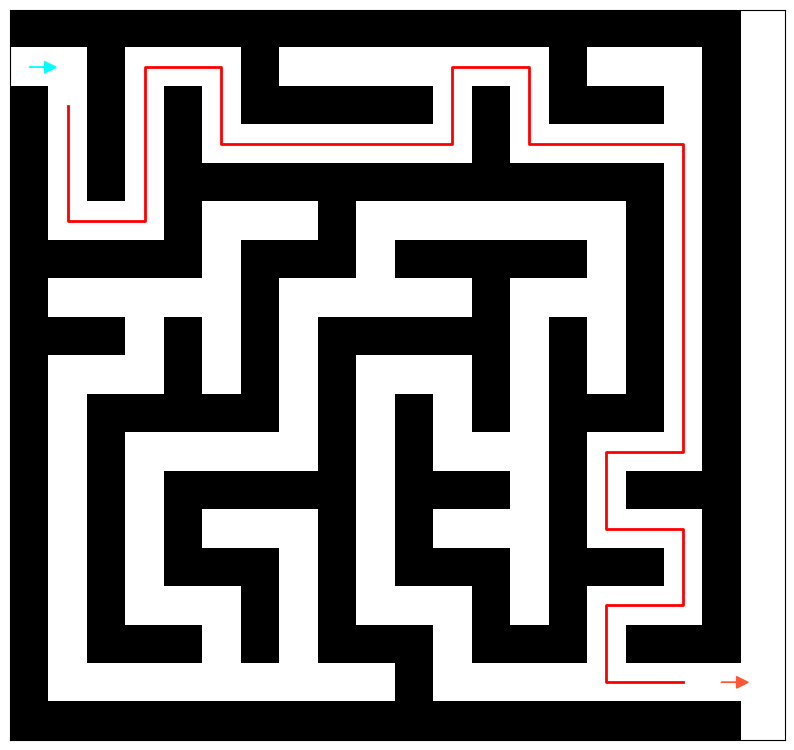

In [110]:
if __name__ == "__main__":
    dim = int(input("Enter the size of the maze: "))
    maze = generate_maze(dim)
    path = find_path(maze)
    draw_maze(maze, path)